# **Kütüphaneler**

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# **Veri Setini Okuma**

In [59]:
df=pd.read_csv("Kiwibank.csv")
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,Christchurch,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Auckland,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,Auckland,Female,42,8,159660.80,3,1,0,113931.57,1


# **Etiketi Etkilemeyen Sütunları Çıkarma**

In [60]:
df=df.drop(['CustomerId', 'Surname'], axis=1)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,Christchurch,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Auckland,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Auckland,Female,42,8,159660.80,3,1,0,113931.57,1


# **Kategorik Sütunlar için Label Encoding**

In [56]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['Geography', 'Gender']:
    df[col] = encoder.fit_transform(df[col])
    print({i: c for i, c in enumerate(encoder.classes_)})

df.head()

{0: 'Auckland', 1: 'Christchurch', 2: 'Dunedin', 3: 'Hamilton', 4: 'Nelson', 5: 'New Plymouth', 6: 'Palmerston North', 7: 'Rotorua', 8: 'Tauranga', 9: 'Wellington'}
{0: 'Female', 1: 'Male'}


,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,5,0,43,2,125510.82,1,1,1,79084.10,0


# **Train Test Split**

In [57]:
X=df.drop(['Churn'], axis=1)
y=df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# **Model Eğitimi, Tahmini ve Performans Metrikleri**

Confusion Matrix:
[[1531   48]
 [ 376   45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1579
           1       0.48      0.11      0.18       421

    accuracy                           0.79      2000
   macro avg       0.64      0.54      0.53      2000
weighted avg       0.74      0.79      0.73      2000

Train Time:  0.009534358978271484
Test Time:  0.0023844242095947266


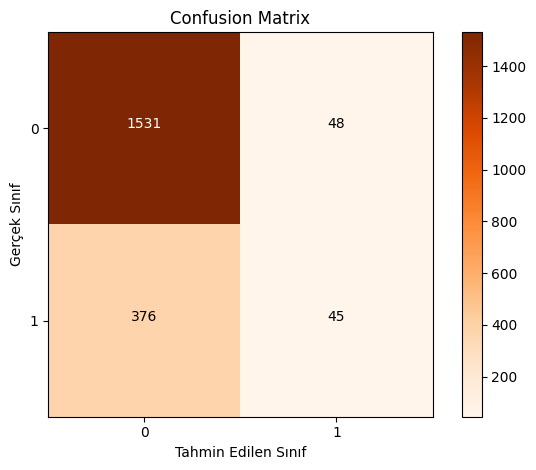

In [58]:
import matplotlib.pyplot as plt

import time
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
gnb=GaussianNB()

start_train = time.time()
model=gnb.fit(X_train, y_train)
train_time_sk = time.time() - start_train

start_test = time.time()
y_pred=model.predict(X_test)
test_time_sk = time.time() - start_test

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Train Time: ", train_time_sk)
print("Test Time: ", test_time_sk)

classes = ["0", "1"]
title = "Confusion Matrix"
cmap = plt.cm.Oranges

plt.figure()
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.ylabel("Gerçek Sınıf")
plt.xlabel("Tahmin Edilen Sınıf")
plt.tight_layout()
plt.show()